In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

sns.set(style="white")

In [28]:
cardio_data = pd.read_csv('../Data/cardio_train.csv', sep=';')
cardio_data.dropna(inplace=True)
cardio_data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


# Exercise 1

### 1.1

a)

In [29]:
cardio = pd.value_counts(cardio_data['cardio'] == 1)

cardio = pd.DataFrame({'cardio': cardio.index, 'values': cardio.values})
cardio

C:\Users\first\AppData\Local\Temp\ipykernel_26876\1984958856.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  cardio = pd.value_counts(cardio_data['cardio'] == 1)


,cardio,values
0,False,35021
1,True,34979


b)

In [30]:
cholestrol = pd.value_counts(cardio_data['cholesterol'])
cholestrol = pd.DataFrame({'cholestrol': cholestrol.index, 'values': cholestrol.values})
cholestrol

C:\Users\first\AppData\Local\Temp\ipykernel_26876\3106194283.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  cholestrol = pd.value_counts(cardio_data['cholesterol'])


,cholestrol,values
0,1,52385
1,2,9549
2,3,8066


C:\Users\first\AppData\Local\Temp\ipykernel_26876\4246118651.py:3: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  ages = pd.value_counts(ages_in_years)


Text(0, 0.5, 'Number of people')

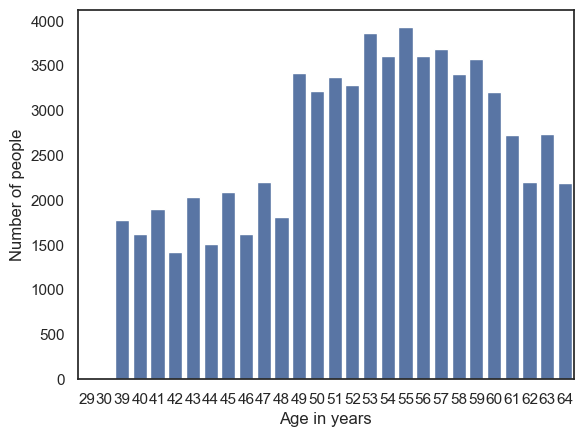

In [31]:
ages_in_years = cardio_data['age'] // 365

ages = pd.value_counts(ages_in_years)
figure = sns.barplot(x=ages.index, y=ages.values)
figure.set_xlabel('Age in years')
figure.set_ylabel('Number of people')

In [32]:
smokers = pd.value_counts(cardio_data['smoke'])
smokers

C:\Users\first\AppData\Local\Temp\ipykernel_26876\2913813338.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  smokers = pd.value_counts(cardio_data['smoke'])


smoke
0    63831
1     6169
Name: count, dtype: int64

C:\Users\first\AppData\Local\Temp\ipykernel_26876\2200919804.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  figure = sns.distplot(weight_distribution, kde=False, bins=40)


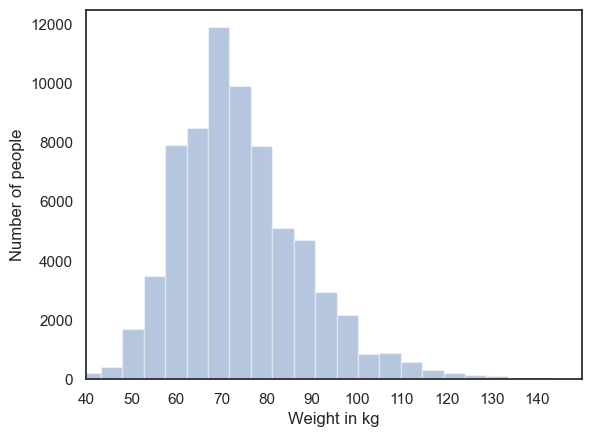

In [33]:
weight_distribution = cardio_data['weight']
figure = sns.distplot(weight_distribution, kde=False, bins=40)
figure.set_xlim(40, 150)
figure.set_xlabel('Weight in kg')
figure.set_ylabel('Number of people')
figure.set_xticks(np.arange(40, 150, 10))

C:\Users\first\AppData\Local\Temp\ipykernel_26876\3156829219.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  figure = sns.distplot(length_distribution, kde=False, bins=40)


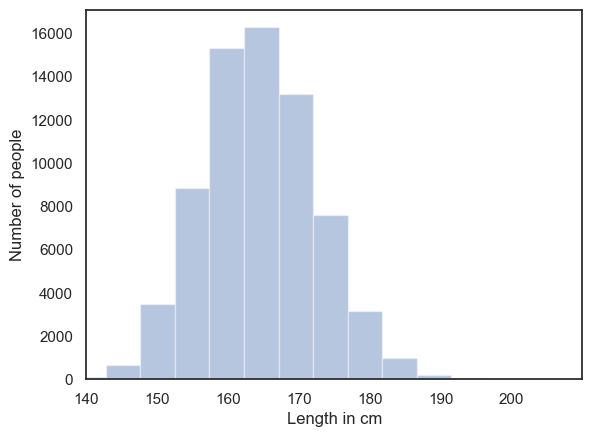

In [34]:
length_distribution = cardio_data['height']
figure = sns.distplot(length_distribution, kde=False, bins=40)
figure.set_xlim(140, 210)
figure.set_xlabel('Length in cm')
figure.set_ylabel('Number of people')
figure.set_xticks(np.arange(140, 210, 10))

In [35]:
female_cardio = cardio_data.groupby("gender").get_group(1)["cardio"].value_counts('cardio')
male_cardio = cardio_data.groupby("gender").get_group(2).value_counts("cardio")
male_cardio

cardio
1    12363
0    12107
Name: count, dtype: int64

<Axes: >

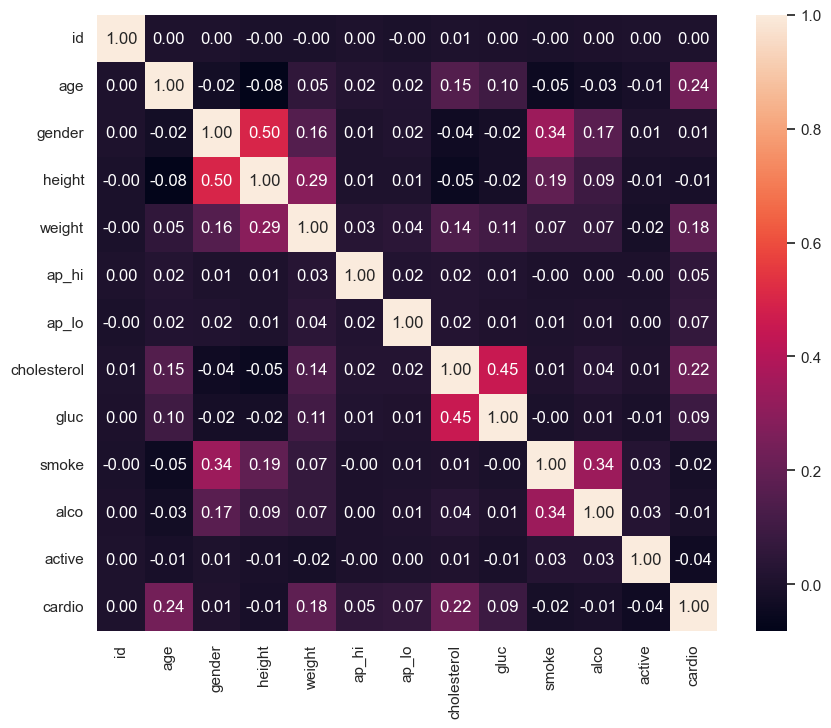

In [36]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(cardio_data.corr(), annot=True, fmt=".2f")

In [37]:
# cardio_data.drop(['gender', 'cardio'], axis=1, inplace=True)
# cardio_data

## 1.2

In [38]:
bmi = cardio_data['weight'] / ((cardio_data['height'] / 100) ** 2)
bmi = pd.DataFrame({'bmi': bmi})

sns.displot(bmi, kde=True)

Error in callback <function flush_figures at 0x000002398C036AC0> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

In [ ]:
cardio_data = pd.concat([cardio_data, bmi], axis=1)
# cardio_data = cardio_data[(cardio_data['bmi'] >= 15) & (cardio_data['bmi'] <= 100)]

z_scores = stats.zscore(cardio_data['bmi'])
threshold = 3
outliers = cardio_data[abs(z_scores) > threshold]

cleaned_data = cardio_data.drop(outliers.index)

cleaned_data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,99992,21074,1,165,80.0,150,80,1,1,0,0,1,1,29.384757
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,26.927438
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,31.353579
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,27.099251


In [ ]:
bmi_categorical = pd.cut(bmi['bmi'], bins=[18.5, 25, 30, 35, 40, 100], labels=[1, 2, 3, 4, 5])
bmi_categorical = pd.DataFrame({'bmi_categorical': bmi_categorical})
cleaned_data = pd.concat([cleaned_data, bmi_categorical], axis=1)
cleaned_data.dropna(inplace=True)

In [ ]:
cleaned_data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,bmi_categorical
0,0.0,18393.0,2.0,168.0,62.0,110.0,80.0,1.0,1.0,0.0,0.0,1.0,0.0,21.967120,1
1,1.0,20228.0,1.0,156.0,85.0,140.0,90.0,3.0,1.0,0.0,0.0,1.0,1.0,34.927679,3
2,2.0,18857.0,1.0,165.0,64.0,130.0,70.0,3.0,1.0,0.0,0.0,0.0,1.0,23.507805,1
3,3.0,17623.0,2.0,169.0,82.0,150.0,100.0,1.0,1.0,0.0,0.0,1.0,1.0,28.710479,2
4,4.0,17474.0,1.0,156.0,56.0,100.0,60.0,1.0,1.0,0.0,0.0,0.0,0.0,23.011177,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,99992.0,21074.0,1.0,165.0,80.0,150.0,80.0,1.0,1.0,0.0,0.0,1.0,1.0,29.384757,2
69995,99993.0,19240.0,2.0,168.0,76.0,120.0,80.0,1.0,1.0,1.0,0.0,1.0,0.0,26.927438,2
69997,99996.0,19066.0,2.0,183.0,105.0,180.0,90.0,3.0,1.0,0.0,1.0,0.0,1.0,31.353579,3
69998,99998.0,22431.0,1.0,163.0,72.0,135.0,80.0,1.0,2.0,0.0,0.0,0.0,1.0,27.099251,2


<Axes: >

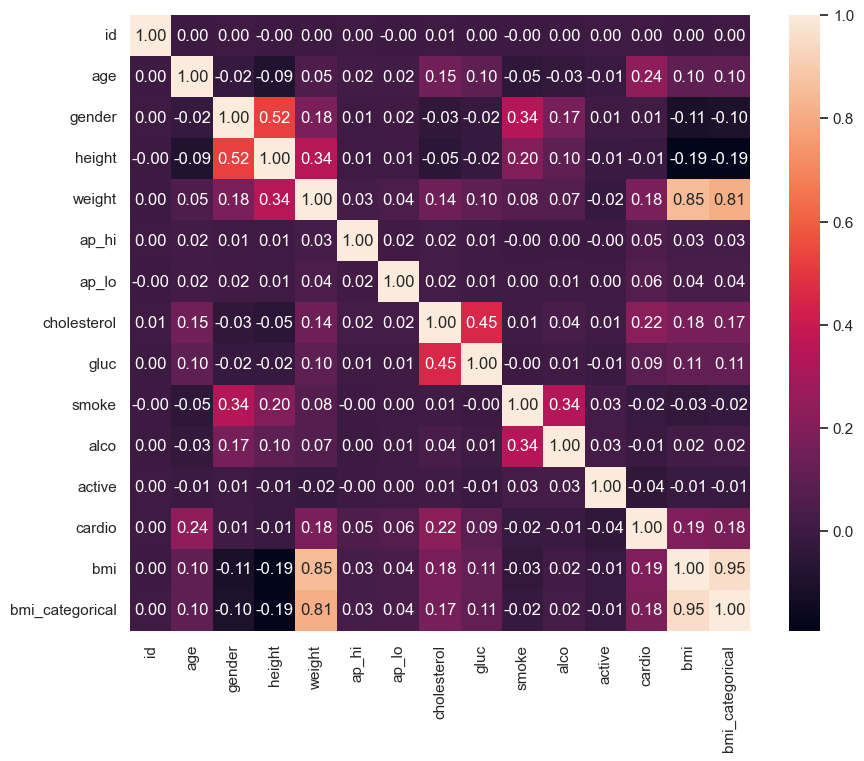

In [ ]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(cleaned_data.corr(), annot=True, fmt=".2f")

In [ ]:
blood_pressure_ranges_systolic = pd.cut(cleaned_data['ap_hi'], bins=[0, 120, 130, 140, 160, 180, 250], labels=[1, 2, 3, 4, 5, 6])
blood_pressure_ranges_systolic = pd.DataFrame({'ap_hi_label': blood_pressure_ranges_systolic})

blood_pressure_ranges_diastolic = pd.cut(cleaned_data['ap_lo'], bins=[0, 80, 85, 90, 100, 120, 180], labels=[1, 2, 3, 4, 5, 6])
blood_pressure_ranges_diastolic = pd.DataFrame({'ap_lo_label': blood_pressure_ranges_diastolic})

In [ ]:
z_scores = stats.zscore(cleaned_data['ap_hi'])
threshold = 3
outliers = cleaned_data[abs(z_scores) > threshold]

# Remove outliers
remove_ap_hi_outliers_df = cleaned_data.drop(outliers.index)

In [ ]:
z_scores = stats.zscore(remove_ap_hi_outliers_df['ap_lo'])
threshold = 3
outliers = remove_ap_hi_outliers_df[abs(z_scores) > threshold]

# Remove outliers
cleaned_data = remove_ap_hi_outliers_df.drop(outliers.index)

In [ ]:
cleaned_data = pd.concat([cleaned_data, blood_pressure_ranges_systolic, blood_pressure_ranges_diastolic], axis=1)
cleaned_data.dropna(inplace=True)

In [ ]:
cleaned_data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,bmi_categorical,ap_hi_label,ap_lo_label
0,0.0,18393.0,2.0,168.0,62.0,110.0,80.0,1.0,1.0,0.0,0.0,1.0,0.0,21.967120,1,1,1
1,1.0,20228.0,1.0,156.0,85.0,140.0,90.0,3.0,1.0,0.0,0.0,1.0,1.0,34.927679,3,3,3
2,2.0,18857.0,1.0,165.0,64.0,130.0,70.0,3.0,1.0,0.0,0.0,0.0,1.0,23.507805,1,2,1
3,3.0,17623.0,2.0,169.0,82.0,150.0,100.0,1.0,1.0,0.0,0.0,1.0,1.0,28.710479,2,4,4
4,4.0,17474.0,1.0,156.0,56.0,100.0,60.0,1.0,1.0,0.0,0.0,0.0,0.0,23.011177,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,99992.0,21074.0,1.0,165.0,80.0,150.0,80.0,1.0,1.0,0.0,0.0,1.0,1.0,29.384757,2,4,1
69995,99993.0,19240.0,2.0,168.0,76.0,120.0,80.0,1.0,1.0,1.0,0.0,1.0,0.0,26.927438,2,1,1
69997,99996.0,19066.0,2.0,183.0,105.0,180.0,90.0,3.0,1.0,0.0,1.0,0.0,1.0,31.353579,3,5,3
69998,99998.0,22431.0,1.0,163.0,72.0,135.0,80.0,1.0,2.0,0.0,0.0,0.0,1.0,27.099251,2,3,1


<Axes: >

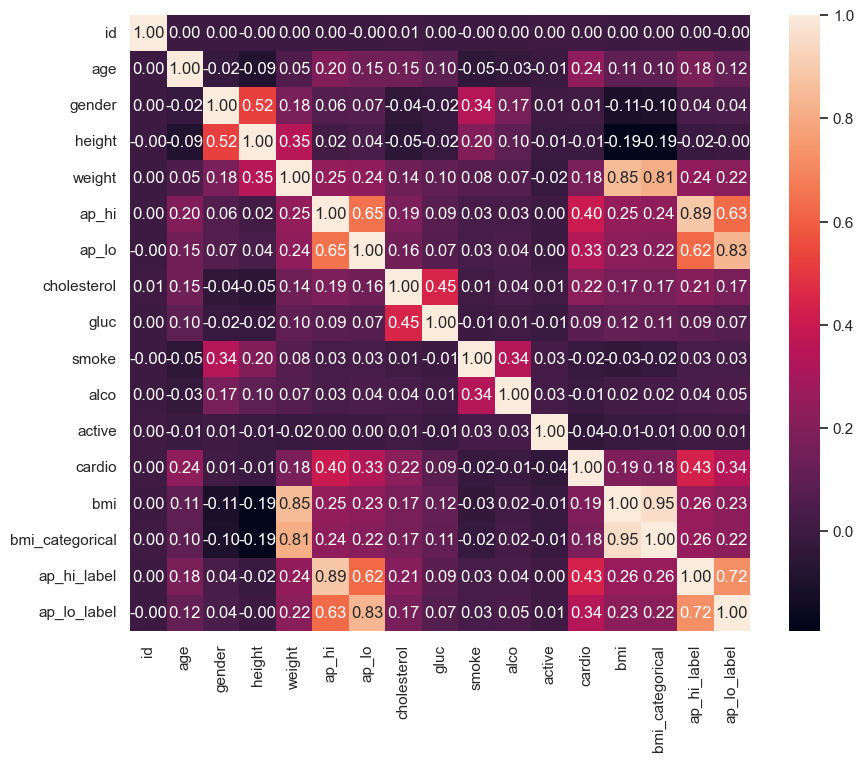

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(cleaned_data.corr(), annot=True, fmt=".2f")

In [ ]:
copy_one_df = cleaned_data.copy()

copy_one_df = pd.get_dummies(copy_one_df, columns=['ap_hi_label', 'gender','ap_lo_label', 'bmi_categorical'], dtype=int)
copy_one_df.drop(['bmi', 'height', 'weight', 'ap_hi', 'ap_lo'], axis=1, inplace=True)

copy_one_df

,id,age,cholesterol,gluc,smoke,alco,active,cardio,ap_hi_label_1,ap_hi_label_2,...,ap_lo_label_2,ap_lo_label_3,ap_lo_label_4,ap_lo_label_5,ap_lo_label_6,bmi_categorical_1,bmi_categorical_2,bmi_categorical_3,bmi_categorical_4,bmi_categorical_5
0,0.0,18393.0,1.0,1.0,0.0,0.0,1.0,0.0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,1.0,20228.0,3.0,1.0,0.0,0.0,1.0,1.0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,2.0,18857.0,3.0,1.0,0.0,0.0,0.0,1.0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,3.0,17623.0,1.0,1.0,0.0,0.0,1.0,1.0,0,0,...,0,0,1,0,0,0,1,0,0,0
4,4.0,17474.0,1.0,1.0,0.0,0.0,0.0,0.0,1,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,99992.0,21074.0,1.0,1.0,0.0,0.0,1.0,1.0,0,0,...,0,0,0,0,0,0,1,0,0,0
69995,99993.0,19240.0,1.0,1.0,1.0,0.0,1.0,0.0,1,0,...,0,0,0,0,0,0,1,0,0,0
69997,99996.0,19066.0,3.0,1.0,0.0,1.0,0.0,1.0,0,0,...,0,1,0,0,0,0,0,1,0,0
69998,99998.0,22431.0,1.0,2.0,0.0,0.0,0.0,1.0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
copy_two_df = cleaned_data.copy()
copy_two_df = pd.get_dummies(copy_two_df, columns=['gender'], dtype=int)
copy_two_df.drop(['bmi_categorical', 'height', 'weight', 'ap_hi_label', 'ap_lo_label'], axis=1, inplace=True)
copy_two_df

,id,age,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,gender_1.0,gender_2.0
0,0.0,18393.0,110.0,80.0,1.0,1.0,0.0,0.0,1.0,0.0,21.967120,0,1
1,1.0,20228.0,140.0,90.0,3.0,1.0,0.0,0.0,1.0,1.0,34.927679,1,0
2,2.0,18857.0,130.0,70.0,3.0,1.0,0.0,0.0,0.0,1.0,23.507805,1,0
3,3.0,17623.0,150.0,100.0,1.0,1.0,0.0,0.0,1.0,1.0,28.710479,0,1
4,4.0,17474.0,100.0,60.0,1.0,1.0,0.0,0.0,0.0,0.0,23.011177,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,99992.0,21074.0,150.0,80.0,1.0,1.0,0.0,0.0,1.0,1.0,29.384757,1,0
69995,99993.0,19240.0,120.0,80.0,1.0,1.0,1.0,0.0,1.0,0.0,26.927438,0,1
69997,99996.0,19066.0,180.0,90.0,3.0,1.0,0.0,1.0,0.0,1.0,31.353579,0,1
69998,99998.0,22431.0,135.0,80.0,1.0,2.0,0.0,0.0,0.0,1.0,27.099251,1,0


<Axes: >

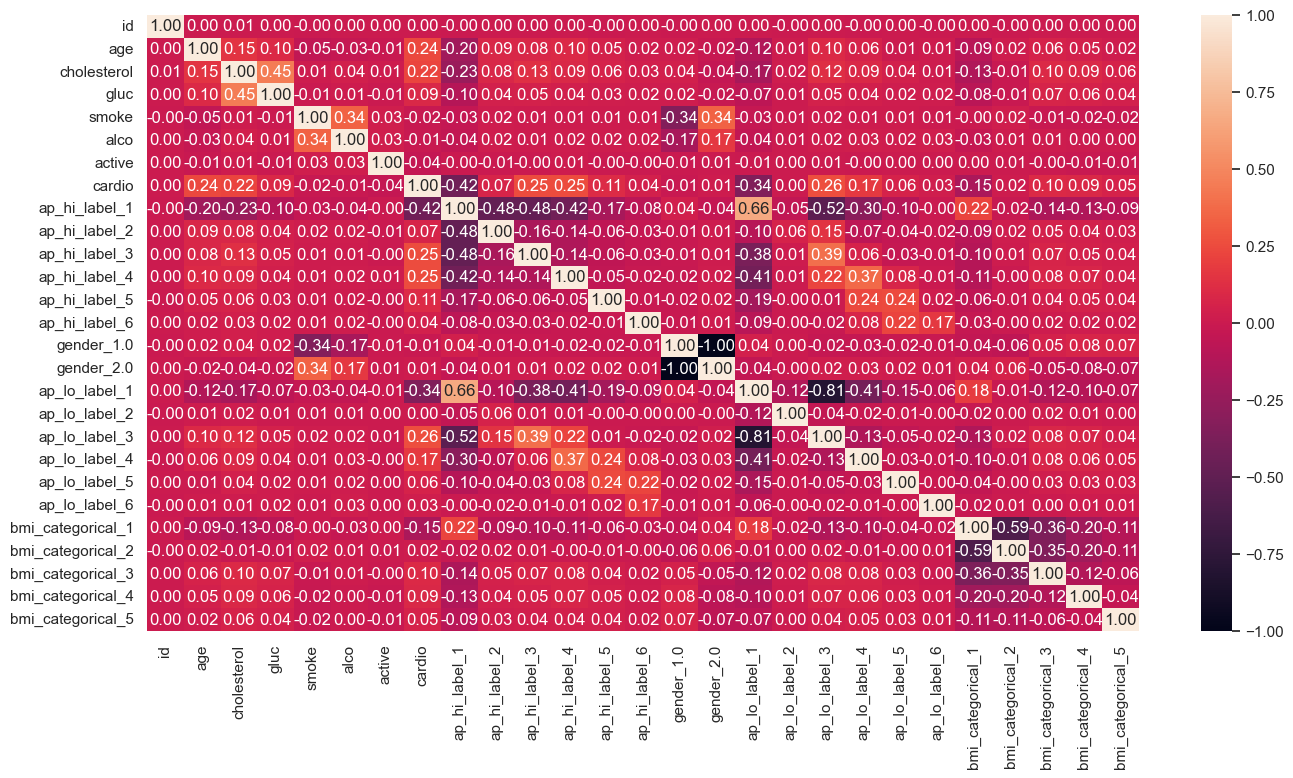

In [ ]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.heatmap(copy_one_df.corr(), annot=True, fmt=".2f")

<Axes: >

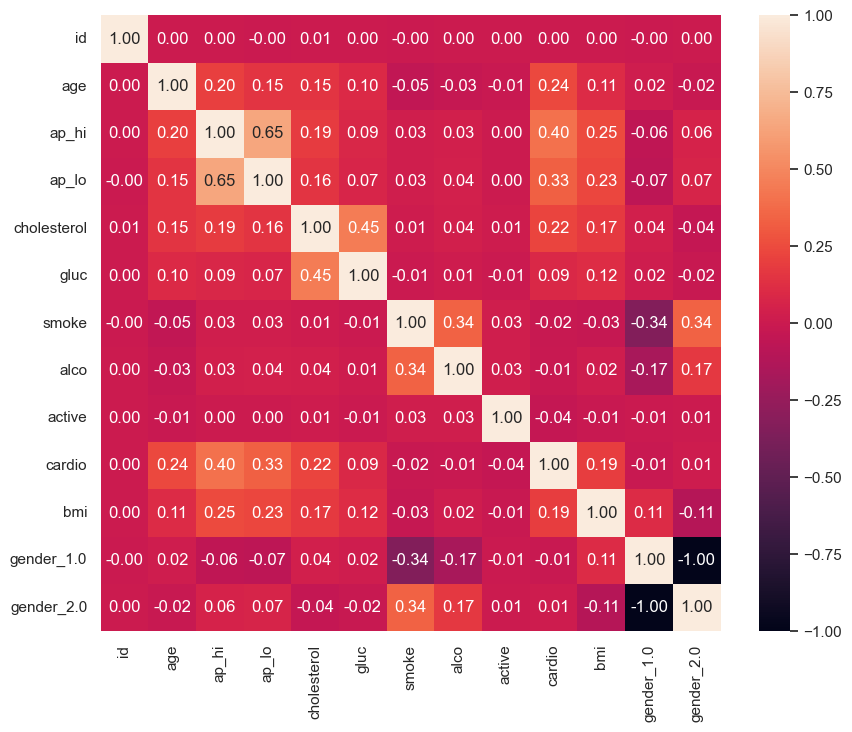

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(copy_two_df.corr(), annot=True, fmt=".2f")

lr pipeline test accuracy: 0.725
Best parameters:  {'clf__C': 0.1}
Confusion Matrix:
Classification Report:
              precision    recall  f1-score   support

         0.0       0.70      0.81      0.75     34200
         1.0       0.77      0.64      0.70     33628

    accuracy                           0.73     67828
   macro avg       0.73      0.72      0.72     67828
weighted avg       0.73      0.73      0.72     67828

knn pipeline test accuracy: 1.000
Best parameters:  {'clf__metric': 'manhattan', 'clf__n_neighbors': 48, 'clf__weights': 'distance'}
Confusion Matrix:
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     34200
         1.0       1.00      1.00      1.00     33628

    accuracy                           1.00     67828
   macro avg       1.00      1.00      1.00     67828
weighted avg       1.00      1.00      1.00     67828

nb pipeline test accuracy: 0.700
Best parameters:  {}
Confusion 

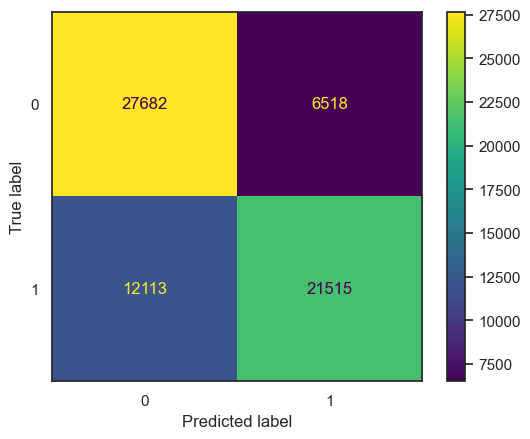

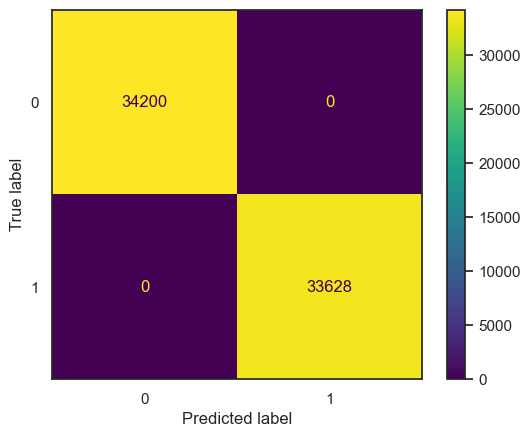

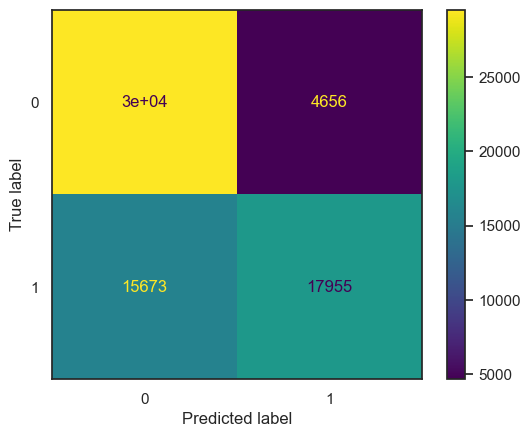

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Define the pipelines
pipelines = {
    'lr': Pipeline([('scl', StandardScaler()), ('clf', LogisticRegression())]),
    'knn': Pipeline([('scl', StandardScaler()), ('clf', KNeighborsClassifier())]),
    'nb': Pipeline([('scl', StandardScaler()), ('clf', GaussianNB())]),
}

# Define the parameter grids
param_grids = {
    'lr': {'clf__C': [0.1, 1, 10]},
    'knn': {'clf__n_neighbors': list(range(50)), 'clf__weights': ['uniform', 'distance'], 'clf__metric': ['euclidean', 'manhattan']},
    'nb': {}
}

# Separate features and target
X_one = copy_one_df.drop('cardio', axis=1)
y_one = copy_one_df['cardio']

# Fit the GridSearchCV objects and print the best parameters
for name, pipeline in pipelines.items():
    grid = GridSearchCV(pipeline, param_grids[name], cv=5, n_jobs=-1)
    grid.fit(X_one, y_one)
    print(f'{name} pipeline test accuracy: {grid.score(X_one, y_one):.3f}')
    print('Best parameters: ', grid.best_params_)
    
    # Make predictions on the test data
    y_pred = grid.predict(X_one)
    
    # Print the confusion matrix
    print('Confusion Matrix:')
    cm = confusion_matrix(y_one, y_pred)
    ConfusionMatrixDisplay(cm).plot()
    
    # Print the classification report
    print('Classification Report:')
    print(classification_report(y_one, y_pred))

lr pipeline test accuracy: 0.725

Best parameters:  {'clf__C': 0.1}

knn pipeline test accuracy: 1.000

Best parameters:  {'clf__metric': 'manhattan', 'clf__n_neighbors': 48, 'clf__weights': 'distance'}

nb pipeline test accuracy: 0.700

Best parameters:  {}

SVC pipeline test accuracy: 0.732
Best parameters:  {'clf__C': 1, 'clf__kernel': 'rbf'}
Confusion Matrix:
Classification Report:
              precision    recall  f1-score   support

         0.0       0.70      0.81      0.75     34200
         1.0       0.77      0.65      0.71     33628

    accuracy                           0.73     67828
   macro avg       0.74      0.73      0.73     67828
weighted avg       0.74      0.73      0.73     67828



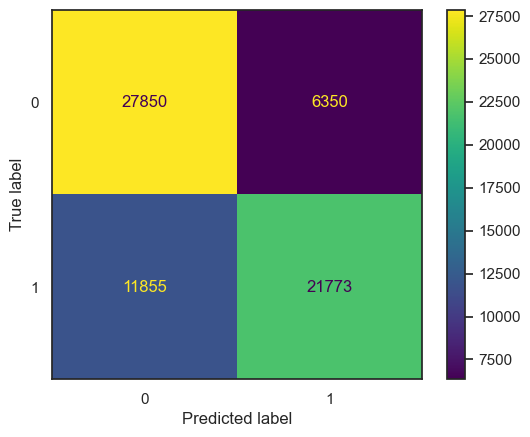

In [ ]:
param_grid_svc = {'clf__C': [0.1, 1, 10], 'clf__kernel': ['rbf']}
pipeline = Pipeline([('scl', StandardScaler()), ('clf', SVC())])

grid = GridSearchCV(pipeline, param_grid_svc, cv=5, n_jobs=-1)
grid.fit(X_one, y_one)

# Make predictions on the test data
y_pred = grid.predict(X_one)

print(f'SVC pipeline test accuracy: {grid.score(X_one, y_one):.3f}')
print('Best parameters: ', grid.best_params_)

# Print the confusion matrix
print('Confusion Matrix:')
cm = confusion_matrix(y_one, y_pred)
ConfusionMatrixDisplay(cm).plot()

# Print the classification report
print('Classification Report:')
print(classification_report(y_one, y_pred))

SVC pipeline test accuracy: 0.732

Best parameters:  {'clf__C': 1, 'clf__kernel': 'rbf'}

lr pipeline test accuracy: 0.725
Best parameters:  {'clf__C': 1}
Confusion Matrix:
Classification Report:
              precision    recall  f1-score   support

         0.0       0.71      0.78      0.74     34200
         1.0       0.75      0.67      0.71     33628

    accuracy                           0.73     67828
   macro avg       0.73      0.72      0.72     67828
weighted avg       0.73      0.73      0.72     67828

knn pipeline test accuracy: 0.736
Best parameters:  {'clf__metric': 'manhattan', 'clf__n_neighbors': 46, 'clf__weights': 'uniform'}
Confusion Matrix:
Classification Report:
              precision    recall  f1-score   support

         0.0       0.71      0.80      0.75     34200
         1.0       0.77      0.67      0.72     33628

    accuracy                           0.74     67828
   macro avg       0.74      0.74      0.74     67828
weighted avg       0.74      0.74      0.74     67828

nb pipeline test accuracy: 0.707
Best parameters:  {}
Confusion Mat

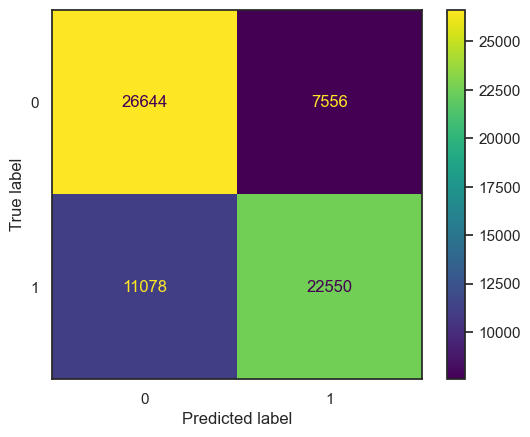

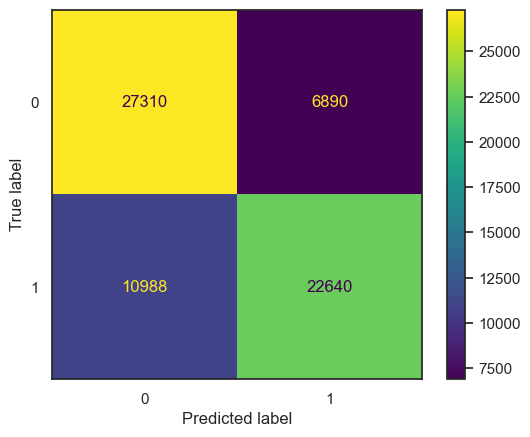

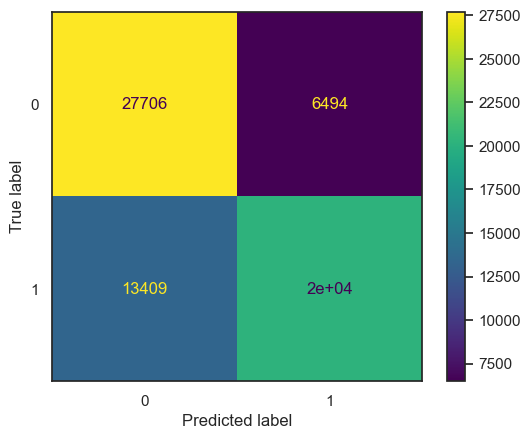

In [ ]:
# Define the pipelines
pipelines = {
    'lr': Pipeline([('scl', StandardScaler()), ('clf', LogisticRegression())]),
    'knn': Pipeline([('scl', StandardScaler()), ('clf', KNeighborsClassifier())]),
    'nb': Pipeline([('scl', StandardScaler()), ('clf', GaussianNB())]),
}

# Define the parameter grids
param_grids = {
    'lr': {'clf__C': [0.1, 1, 10]},
    'knn': {'clf__n_neighbors': list(range(50)), 'clf__weights': ['uniform', 'distance'], 'clf__metric': ['euclidean', 'manhattan']},
    'nb': {}
}

# Separate features and target
X_two = copy_two_df.drop('cardio', axis=1)
y_two = copy_two_df['cardio']

# Fit the GridSearchCV objects and print the best parameters
for name, pipeline in pipelines.items():
    grid = GridSearchCV(pipeline, param_grids[name], cv=5, n_jobs=-1)
    grid.fit(X_two, y_two)
    print(f'{name} pipeline test accuracy: {grid.score(X_two, y_two):.3f}')
    print('Best parameters: ', grid.best_params_)
    
    # Make predictions on the test data
    y_pred = grid.predict(X_two)
    
    # Print the confusion matrix
    print('Confusion Matrix:')
    cm = confusion_matrix(y_two, y_pred)
    ConfusionMatrixDisplay(cm).plot()
    
    # Print the classification report
    print('Classification Report:')
    print(classification_report(y_two, y_pred))

lr pipeline test accuracy: 0.725

Best parameters:  {'clf__C': 1}

knn pipeline test accuracy: 0.736

Best parameters:  {'clf__metric': 'manhattan', 'clf__n_neighbors': 46, 'clf__weights': 'uniform'}

nb pipeline test accuracy: 0.707

Best parameters:  {}

SVC pipeline test accuracy: 0.738
Best parameters:  {'clf__C': 1, 'clf__kernel': 'rbf'}
Confusion Matrix:
Classification Report:
              precision    recall  f1-score   support

         0.0       0.72      0.80      0.75     34200
         1.0       0.77      0.68      0.72     33628

    accuracy                           0.74     67828
   macro avg       0.74      0.74      0.74     67828
weighted avg       0.74      0.74      0.74     67828



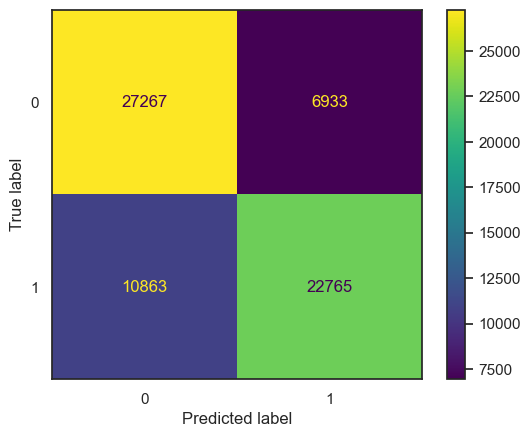

In [ ]:
param_grid_svc = {'clf__C': [0.1, 1, 10], 'clf__kernel': ['rbf']}
pipeline = Pipeline([('scl', StandardScaler()), ('clf', SVC())])

grid = GridSearchCV(pipeline, param_grid_svc, cv=5, n_jobs=-1)
grid.fit(X_two, y_two)

# Make predictions on the test data
y_pred = grid.predict(X_two)

print(f'SVC pipeline test accuracy: {grid.score(X_two, y_two):.3f}')
print('Best parameters: ', grid.best_params_)

# Print the confusion matrix
print('Confusion Matrix:')
cm = confusion_matrix(y_two, y_pred)
ConfusionMatrixDisplay(cm).plot()

# Print the classification report
print('Classification Report:')
print(classification_report(y_two, y_pred))

SVC pipeline test accuracy: 0.738

Best parameters:  {'clf__C': 1, 'clf__kernel': 'rbf'}

In [ ]:
# Set the random state
np.random.seed(42)

# Reset the index of copy_one_df
copy_one_df = copy_one_df.reset_index(drop=True)

# Generate 100 random indices
random_indices = np.random.choice(copy_one_df.index, size=100, replace=False)

# Select rows with these indices
test_samples = copy_one_df.iloc[random_indices]

# Export these rows to a CSV file
test_samples.to_csv('test_samples.csv', index=False)

# Remove these rows from the DataFrame
copy_one_df = copy_one_df.drop(random_indices)

copy_one_df

,id,age,cholesterol,gluc,smoke,alco,active,cardio,ap_hi_label_1,ap_hi_label_2,...,ap_lo_label_2,ap_lo_label_3,ap_lo_label_4,ap_lo_label_5,ap_lo_label_6,bmi_categorical_1,bmi_categorical_2,bmi_categorical_3,bmi_categorical_4,bmi_categorical_5
0,0.0,18393.0,1.0,1.0,0.0,0.0,1.0,0.0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,1.0,20228.0,3.0,1.0,0.0,0.0,1.0,1.0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,2.0,18857.0,3.0,1.0,0.0,0.0,0.0,1.0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,3.0,17623.0,1.0,1.0,0.0,0.0,1.0,1.0,0,0,...,0,0,1,0,0,0,1,0,0,0
4,4.0,17474.0,1.0,1.0,0.0,0.0,0.0,0.0,1,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67823,99992.0,21074.0,1.0,1.0,0.0,0.0,1.0,1.0,0,0,...,0,0,0,0,0,0,1,0,0,0
67824,99993.0,19240.0,1.0,1.0,1.0,0.0,1.0,0.0,1,0,...,0,0,0,0,0,0,1,0,0,0
67825,99996.0,19066.0,3.0,1.0,0.0,1.0,0.0,1.0,0,0,...,0,1,0,0,0,0,0,1,0,0
67826,99998.0,22431.0,1.0,2.0,0.0,0.0,0.0,1.0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(copy_one_df)
y = copy_one_df['cardio']

# Create and fit the KNN model
knn = KNeighborsClassifier(n_neighbors=48, weights='distance', metric='manhattan')
knn.fit(X_train, y)

KNeighborsClassifier(metric='manhattan', n_neighbors=48, weights='distance')

In [ ]:
import joblib

# Save the model to disk
joblib.dump(knn, 'knn_model.pkl')

['knn_model.pkl']

# Exercise 2

In [64]:
movies_data = pd.read_csv('../Data/movies.csv')
movies_data = movies_data.drop_duplicates()
movies_data

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
62418,209157,We (2018),Drama
62419,209159,Window of the Soul (2001),Documentary
62420,209163,Bad Poems (2018),Comedy|Drama
62421,209169,A Girl Thing (2001),(no genres listed)


In [65]:
ratings_data = pd.read_csv('../Data/ratings.csv')
ratings_data = ratings_data.drop('timestamp', axis=1)
ratings_data = ratings_data.drop_duplicates()
ratings_data

,userId,movieId,rating
0,1,296,5.0
1,1,306,3.5
2,1,307,5.0
3,1,665,5.0
4,1,899,3.5
...,...,...,...
25000090,162541,50872,4.5
25000091,162541,55768,2.5
25000092,162541,56176,2.0
25000093,162541,58559,4.0


In [66]:
tags_data = pd.read_csv('../Data/tags.csv')
tags_data = tags_data.drop_duplicates()
tags_data = tags_data.drop('timestamp', axis=1)
tags_data

,userId,movieId,tag
0,3,260,classic
1,3,260,sci-fi
2,4,1732,dark comedy
3,4,1732,great dialogue
4,4,7569,so bad it's good
...,...,...,...
1093355,162521,66934,Neil Patrick Harris
1093356,162521,103341,cornetto trilogy
1093357,162534,189169,comedy
1093358,162534,189169,disabled


In [71]:
# Drop unnecessary columns
movies_data = movies_data[['movieId', 'title', 'genres']]  # replace 'title' with the columns you need
ratings_data = ratings_data[['movieId', 'rating']]  # replace 'rating' with the columns you need
tags_data = tags_data[['movieId', 'tag']]  # replace 'tag' with the columns you need

# Merge the data
merged_data = pd.merge(movies_data, ratings_data, on='movieId')
merged_data

,movieId,title,genres,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.5
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.0
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0
...,...,...,...,...
25000090,209157,We (2018),Drama,1.5
25000091,209159,Window of the Soul (2001),Documentary,3.0
25000092,209163,Bad Poems (2018),Comedy|Drama,4.5
25000093,209169,A Girl Thing (2001),(no genres listed),3.0


In [72]:
merged_data = pd.merge(merged_data, tags_data, on='movieId')
merged_data

MemoryError: Unable to allocate 81.1 GiB for an array with shape (10883253790,) and data type int64